In [1]:
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
data=pd.read_csv('/kaggle/input/engineering-graduate-salary-prediction/Engineering_graduate_salary.csv')
data.head()

,ID,Gender,DOB,10percentage,10board,12graduation,12percentage,12board,CollegeID,CollegeTier,...,MechanicalEngg,ElectricalEngg,TelecomEngg,CivilEngg,conscientiousness,agreeableness,extraversion,nueroticism,openess_to_experience,Salary
0,604399,f,1990-10-22,87.80,cbse,2009,84.00,cbse,6920,1,...,-1,-1,-1,-1,-0.1590,0.3789,1.2396,0.14590,0.2889,445000
1,988334,m,1990-05-15,57.00,cbse,2010,64.50,cbse,6624,2,...,-1,-1,-1,-1,1.1336,0.0459,1.2396,0.52620,-0.2859,110000
2,301647,m,1989-08-21,77.33,"maharashtra state board,pune",2007,85.17,amravati divisional board,9084,2,...,-1,-1,260,-1,0.5100,-0.1232,1.5428,-0.29020,-0.2875,255000
3,582313,m,1991-05-04,84.30,cbse,2009,86.00,cbse,8195,1,...,-1,-1,-1,-1,-0.4463,0.2124,0.3174,0.27270,0.4805,420000
4,339001,f,1990-10-30,82.00,cbse,2008,75.00,cbse,4889,2,...,-1,-1,-1,-1,-1.4992,-0.7473,-1.0697,0.06223,0.1864,200000


In [3]:
data.columns

Index(['ID', 'Gender', 'DOB', '10percentage', '10board', '12graduation',
       '12percentage', '12board', 'CollegeID', 'CollegeTier', 'Degree',
       'Specialization', 'collegeGPA', 'CollegeCityID', 'CollegeCityTier',
       'CollegeState', 'GraduationYear', 'English', 'Logical', 'Quant',
       'Domain', 'ComputerProgramming', 'ElectronicsAndSemicon',
       'ComputerScience', 'MechanicalEngg', 'ElectricalEngg', 'TelecomEngg',
       'CivilEngg', 'conscientiousness', 'agreeableness', 'extraversion',
       'nueroticism', 'openess_to_experience', 'Salary'],
      dtype='object')

Now since we are going to predict salaries, we can drop certain columns which are not going to have an impact on salary like: ID, DOB, 10board, 12board, CollegeID, CollegeCityID, CollegeCityTier, CollegeState, GraduationYear

In [4]:
data.drop(columns=['ID', 'DOB', '10board', '12board', '12graduation', 'CollegeID', 'CollegeCityID', 'CollegeCityTier', 'CollegeState', 'GraduationYear'], axis=1, inplace=True)
data.head()

,Gender,10percentage,12percentage,CollegeTier,Degree,Specialization,collegeGPA,English,Logical,Quant,...,MechanicalEngg,ElectricalEngg,TelecomEngg,CivilEngg,conscientiousness,agreeableness,extraversion,nueroticism,openess_to_experience,Salary
0,f,87.80,84.00,1,B.Tech/B.E.,instrumentation and control engineering,73.82,650,665,810,...,-1,-1,-1,-1,-0.1590,0.3789,1.2396,0.14590,0.2889,445000
1,m,57.00,64.50,2,B.Tech/B.E.,computer science & engineering,65.00,440,435,210,...,-1,-1,-1,-1,1.1336,0.0459,1.2396,0.52620,-0.2859,110000
2,m,77.33,85.17,2,B.Tech/B.E.,electronics & telecommunications,61.94,485,475,505,...,-1,-1,260,-1,0.5100,-0.1232,1.5428,-0.29020,-0.2875,255000
3,m,84.30,86.00,1,B.Tech/B.E.,computer science & engineering,80.40,675,620,635,...,-1,-1,-1,-1,-0.4463,0.2124,0.3174,0.27270,0.4805,420000
4,f,82.00,75.00,2,B.Tech/B.E.,biotechnology,64.30,575,495,365,...,-1,-1,-1,-1,-1.4992,-0.7473,-1.0697,0.06223,0.1864,200000


In [5]:
data.shape

(2998, 24)

In [6]:
data.drop_duplicates()
data.shape

(2998, 24)

We can conclude there were no duplicate entries.

In [7]:
data.isnull().sum()

Gender                   0
10percentage             0
12percentage             0
CollegeTier              0
Degree                   0
Specialization           0
collegeGPA               0
English                  0
Logical                  0
Quant                    0
Domain                   0
ComputerProgramming      0
ElectronicsAndSemicon    0
ComputerScience          0
MechanicalEngg           0
ElectricalEngg           0
TelecomEngg              0
CivilEngg                0
conscientiousness        0
agreeableness            0
extraversion             0
nueroticism              0
openess_to_experience    0
Salary                   0
dtype: int64

There are no null values either.

In [8]:
data.columns

Index(['Gender', '10percentage', '12percentage', 'CollegeTier', 'Degree',
       'Specialization', 'collegeGPA', 'English', 'Logical', 'Quant', 'Domain',
       'ComputerProgramming', 'ElectronicsAndSemicon', 'ComputerScience',
       'MechanicalEngg', 'ElectricalEngg', 'TelecomEngg', 'CivilEngg',
       'conscientiousness', 'agreeableness', 'extraversion', 'nueroticism',
       'openess_to_experience', 'Salary'],
      dtype='object')

In [9]:
data.describe()

,10percentage,12percentage,CollegeTier,collegeGPA,English,Logical,Quant,Domain,ComputerProgramming,ElectronicsAndSemicon,...,MechanicalEngg,ElectricalEngg,TelecomEngg,CivilEngg,conscientiousness,agreeableness,extraversion,nueroticism,openess_to_experience,Salary
count,2998.000000,2998.000000,2998.000000,2998.000000,2998.000000,2998.000000,2998.000000,2998.000000,2998.000000,2998.000000,...,2998.000000,2998.000000,2998.000000,2998.000000,2998.000000,2998.000000,2998.000000,2998.000000,2998.000000,2.998000e+03
mean,77.666264,74.341061,1.924616,71.509857,501.066378,500.431621,514.137759,0.508458,351.868579,96.228152,...,24.138759,16.267845,31.068379,1.946965,-0.038714,0.126217,-0.008662,-0.145965,-0.141111,3.051748e+05
std,10.002785,11.120299,0.264053,8.122462,105.304512,87.299850,122.194955,0.463373,204.526227,158.737747,...,99.785138,86.054739,103.552963,32.241501,1.024974,0.955831,0.962695,1.012901,1.007134,2.123312e+05
min,43.000000,40.000000,1.000000,6.630000,180.000000,195.000000,120.000000,-1.000000,-1.000000,-1.000000,...,-1.000000,-1.000000,-1.000000,-1.000000,-3.893300,-5.781600,-4.600900,-2.643000,-7.375700,3.500000e+04
25%,71.140000,66.000000,2.000000,66.530000,425.000000,441.250000,430.000000,0.342315,295.000000,-1.000000,...,-1.000000,-1.000000,-1.000000,-1.000000,-0.649100,-0.435300,-0.604800,-0.868200,-0.669200,1.800000e+05
50%,78.965000,74.000000,2.000000,71.800000,500.000000,505.000000,515.000000,0.622643,415.000000,-1.000000,...,-1.000000,-1.000000,-1.000000,-1.000000,0.046400,0.212400,0.091400,-0.172700,-0.094300,3.000000e+05
75%,85.600000,82.600000,2.000000,76.300000,570.000000,565.000000,595.000000,0.835612,495.000000,233.000000,...,-1.000000,-1.000000,-1.000000,-1.000000,0.702700,0.812800,0.672000,0.526200,0.502400,3.700000e+05
max,97.760000,98.700000,2.000000,99.930000,875.000000,795.000000,900.000000,0.999910,804.000000,612.000000,...,623.000000,660.000000,548.000000,500.000000,1.995300,1.904800,2.161700,3.352500,1.630200,4.000000e+06


Here we can see various columns have outliers so we will remove them.

Lets start with analyzing Degree column.

In [10]:
data['Degree'].value_counts()

Degree
B.Tech/B.E.      2757
MCA               200
M.Tech./M.E.       40
M.Sc. (Tech.)       1
Name: count, dtype: int64

Looks okay as there are 4 unique types.

Lets analyze Specialization column

In [11]:
data['Specialization'].unique()

array(['instrumentation and control engineering',
       'computer science & engineering',
       'electronics & telecommunications', 'biotechnology',
       'mechanical engineering', 'information technology',
       'electronics and communication engineering',
       'computer engineering', 'computer application',
       'computer science and technology', 'electrical engineering',
       'automobile/automotive engineering',
       'electronics and electrical engineering',
       'information science engineering', 'chemical engineering',
       'instrumentation engineering', 'electronics & instrumentation eng',
       'ceramic engineering', 'metallurgical engineering',
       'aeronautical engineering', 'electronics engineering',
       'electronics and instrumentation engineering',
       'applied electronics and instrumentation', 'civil engineering',
       'computer and communication engineering',
       'industrial & production engineering', 'computer networking',
       'other', '

So many unique values. So we will put all specialization with less than 10 students in others column.

In [12]:
data['Specialization'].value_counts()

Specialization
electronics and communication engineering      670
computer science & engineering                 557
information technology                         506
computer engineering                           415
computer application                           201
mechanical engineering                         155
electronics and electrical engineering         148
electronics & telecommunications                89
electrical engineering                          63
electronics & instrumentation eng               24
instrumentation and control engineering         18
information science engineering                 18
electronics and instrumentation engineering     18
civil engineering                               15
electronics engineering                         13
biotechnology                                   12
other                                           10
industrial & production engineering              8
chemical engineering                             7
applied electron

In [13]:
specialization_list=data['Specialization'].value_counts()
specialization_list_lessthan10=specialization_list[specialization_list<=10]
specialization_list_lessthan10

Specialization
other                                      10
industrial & production engineering         8
chemical engineering                        7
applied electronics and instrumentation     5
mechanical and automation                   5
telecommunication engineering               4
automobile/automotive engineering           4
computer science and technology             4
aeronautical engineering                    3
instrumentation engineering                 3
electronics and computer engineering        3
mechatronics                                3
metallurgical engineering                   2
industrial engineering                      2
biomedical engineering                      2
information & communication technology      1
electronics                                 1
embedded systems technology                 1
industrial & management engineering         1
electrical and power engineering            1
computer and communication engineering      1
mechanical & produc

In [14]:
def update_specialization(value):
    if value in specialization_list_lessthan10:
        return 'others'
    else:
        return value

data['Specialization']=data['Specialization'].apply(update_specialization)
data['Specialization'].value_counts()

Specialization
electronics and communication engineering      670
computer science & engineering                 557
information technology                         506
computer engineering                           415
computer application                           201
mechanical engineering                         155
electronics and electrical engineering         148
electronics & telecommunications                89
others                                          76
electrical engineering                          63
electronics & instrumentation eng               24
electronics and instrumentation engineering     18
instrumentation and control engineering         18
information science engineering                 18
civil engineering                               15
electronics engineering                         13
biotechnology                                   12
Name: count, dtype: int64

In [15]:
data.head()

,Gender,10percentage,12percentage,CollegeTier,Degree,Specialization,collegeGPA,English,Logical,Quant,...,MechanicalEngg,ElectricalEngg,TelecomEngg,CivilEngg,conscientiousness,agreeableness,extraversion,nueroticism,openess_to_experience,Salary
0,f,87.80,84.00,1,B.Tech/B.E.,instrumentation and control engineering,73.82,650,665,810,...,-1,-1,-1,-1,-0.1590,0.3789,1.2396,0.14590,0.2889,445000
1,m,57.00,64.50,2,B.Tech/B.E.,computer science & engineering,65.00,440,435,210,...,-1,-1,-1,-1,1.1336,0.0459,1.2396,0.52620,-0.2859,110000
2,m,77.33,85.17,2,B.Tech/B.E.,electronics & telecommunications,61.94,485,475,505,...,-1,-1,260,-1,0.5100,-0.1232,1.5428,-0.29020,-0.2875,255000
3,m,84.30,86.00,1,B.Tech/B.E.,computer science & engineering,80.40,675,620,635,...,-1,-1,-1,-1,-0.4463,0.2124,0.3174,0.27270,0.4805,420000
4,f,82.00,75.00,2,B.Tech/B.E.,biotechnology,64.30,575,495,365,...,-1,-1,-1,-1,-1.4992,-0.7473,-1.0697,0.06223,0.1864,200000


Lets take a look at Gender column

In [16]:
data['Gender'].value_counts()

Gender
m    2282
f     716
Name: count, dtype: int64

In [17]:
def gender(value):
    if value == 'f':
        return 'female'
    else:
        return 'male'
    
data['Gender']=data['Gender'].apply(gender)
data.head()

,Gender,10percentage,12percentage,CollegeTier,Degree,Specialization,collegeGPA,English,Logical,Quant,...,MechanicalEngg,ElectricalEngg,TelecomEngg,CivilEngg,conscientiousness,agreeableness,extraversion,nueroticism,openess_to_experience,Salary
0,female,87.80,84.00,1,B.Tech/B.E.,instrumentation and control engineering,73.82,650,665,810,...,-1,-1,-1,-1,-0.1590,0.3789,1.2396,0.14590,0.2889,445000
1,male,57.00,64.50,2,B.Tech/B.E.,computer science & engineering,65.00,440,435,210,...,-1,-1,-1,-1,1.1336,0.0459,1.2396,0.52620,-0.2859,110000
2,male,77.33,85.17,2,B.Tech/B.E.,electronics & telecommunications,61.94,485,475,505,...,-1,-1,260,-1,0.5100,-0.1232,1.5428,-0.29020,-0.2875,255000
3,male,84.30,86.00,1,B.Tech/B.E.,computer science & engineering,80.40,675,620,635,...,-1,-1,-1,-1,-0.4463,0.2124,0.3174,0.27270,0.4805,420000
4,female,82.00,75.00,2,B.Tech/B.E.,biotechnology,64.30,575,495,365,...,-1,-1,-1,-1,-1.4992,-0.7473,-1.0697,0.06223,0.1864,200000


Now lets take a look at collegeGPA column

In [18]:
data['collegeGPA'].describe()

count    2998.000000
mean       71.509857
std         8.122462
min         6.630000
25%        66.530000
50%        71.800000
75%        76.300000
max        99.930000
Name: collegeGPA, dtype: float64

We can see that there are some outliers here as the mean is 71 whereas the minum value is far apart: 6. So we will use scatterplot to analyze it.

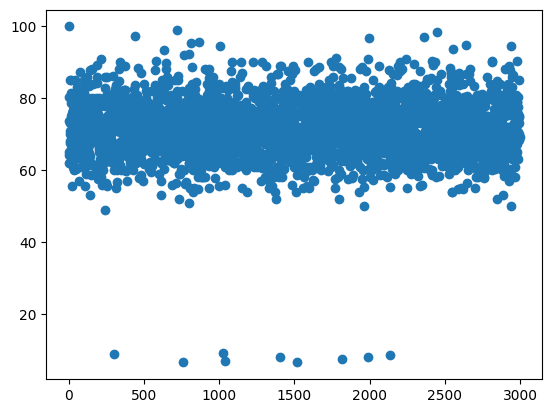

In [19]:
plt.scatter(data.index, data['collegeGPA'])

We can see from scatterplot that there are around 8-10 outliers. We can consider anything below collegeGPA 40 as an outlier. Now lets eliminate those outliers.

In [20]:
data.shape

(2998, 24)

In [21]:
data=data[data['collegeGPA']>40]

In [22]:
data.shape

(2989, 24)

In [23]:
data.head()

,Gender,10percentage,12percentage,CollegeTier,Degree,Specialization,collegeGPA,English,Logical,Quant,...,MechanicalEngg,ElectricalEngg,TelecomEngg,CivilEngg,conscientiousness,agreeableness,extraversion,nueroticism,openess_to_experience,Salary
0,female,87.80,84.00,1,B.Tech/B.E.,instrumentation and control engineering,73.82,650,665,810,...,-1,-1,-1,-1,-0.1590,0.3789,1.2396,0.14590,0.2889,445000
1,male,57.00,64.50,2,B.Tech/B.E.,computer science & engineering,65.00,440,435,210,...,-1,-1,-1,-1,1.1336,0.0459,1.2396,0.52620,-0.2859,110000
2,male,77.33,85.17,2,B.Tech/B.E.,electronics & telecommunications,61.94,485,475,505,...,-1,-1,260,-1,0.5100,-0.1232,1.5428,-0.29020,-0.2875,255000
3,male,84.30,86.00,1,B.Tech/B.E.,computer science & engineering,80.40,675,620,635,...,-1,-1,-1,-1,-0.4463,0.2124,0.3174,0.27270,0.4805,420000
4,female,82.00,75.00,2,B.Tech/B.E.,biotechnology,64.30,575,495,365,...,-1,-1,-1,-1,-1.4992,-0.7473,-1.0697,0.06223,0.1864,200000


In [24]:
data.columns

Index(['Gender', '10percentage', '12percentage', 'CollegeTier', 'Degree',
       'Specialization', 'collegeGPA', 'English', 'Logical', 'Quant', 'Domain',
       'ComputerProgramming', 'ElectronicsAndSemicon', 'ComputerScience',
       'MechanicalEngg', 'ElectricalEngg', 'TelecomEngg', 'CivilEngg',
       'conscientiousness', 'agreeableness', 'extraversion', 'nueroticism',
       'openess_to_experience', 'Salary'],
      dtype='object')

Now lets visualize English, Logical and Quant

Text(0.5, 1.0, 'Quant')

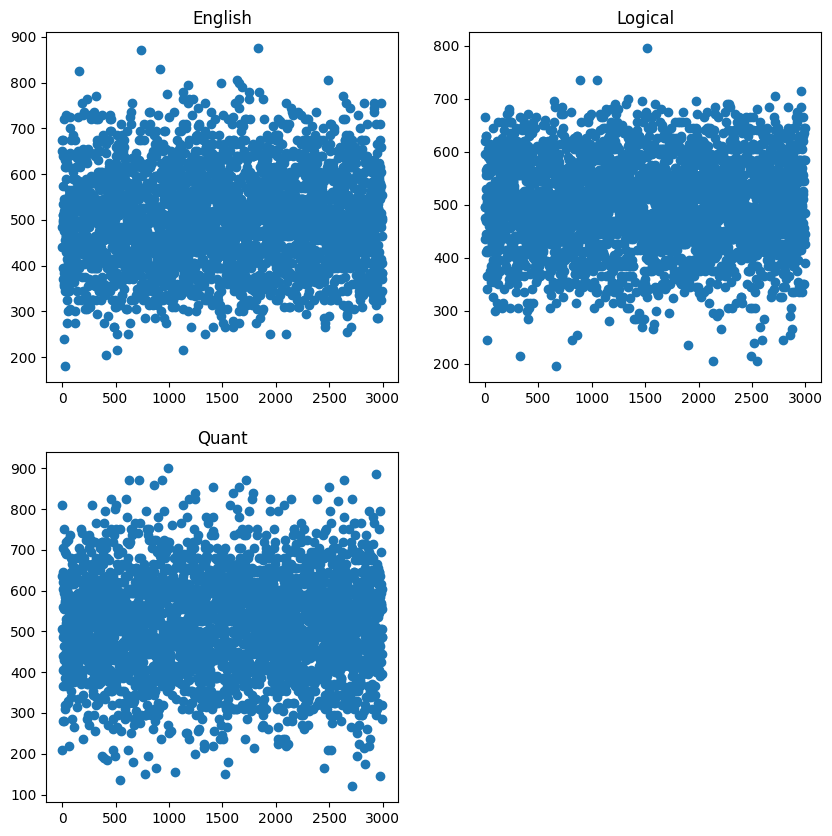

In [25]:
plt.figure(figsize=(10,10))

plt.subplot(2,2,1)
plt.scatter(data.index, data['English'])
plt.title('English')

plt.subplot(2,2,2)
plt.scatter(data.index, data['Logical'])
plt.title('Logical')

plt.subplot(2,2,3)
plt.scatter(data.index, data['Quant'])
plt.title('Quant')

Can't really see any outliers here so no need to clean them.

In [26]:
data.columns

Index(['Gender', '10percentage', '12percentage', 'CollegeTier', 'Degree',
       'Specialization', 'collegeGPA', 'English', 'Logical', 'Quant', 'Domain',
       'ComputerProgramming', 'ElectronicsAndSemicon', 'ComputerScience',
       'MechanicalEngg', 'ElectricalEngg', 'TelecomEngg', 'CivilEngg',
       'conscientiousness', 'agreeableness', 'extraversion', 'nueroticism',
       'openess_to_experience', 'Salary'],
      dtype='object')

Lets do the same kind of analysis for 'Domain','ComputerProgramming', 'ElectronicsAndSemicon'.

Text(0.5, 1.0, 'ElectronicsAndSemicon')

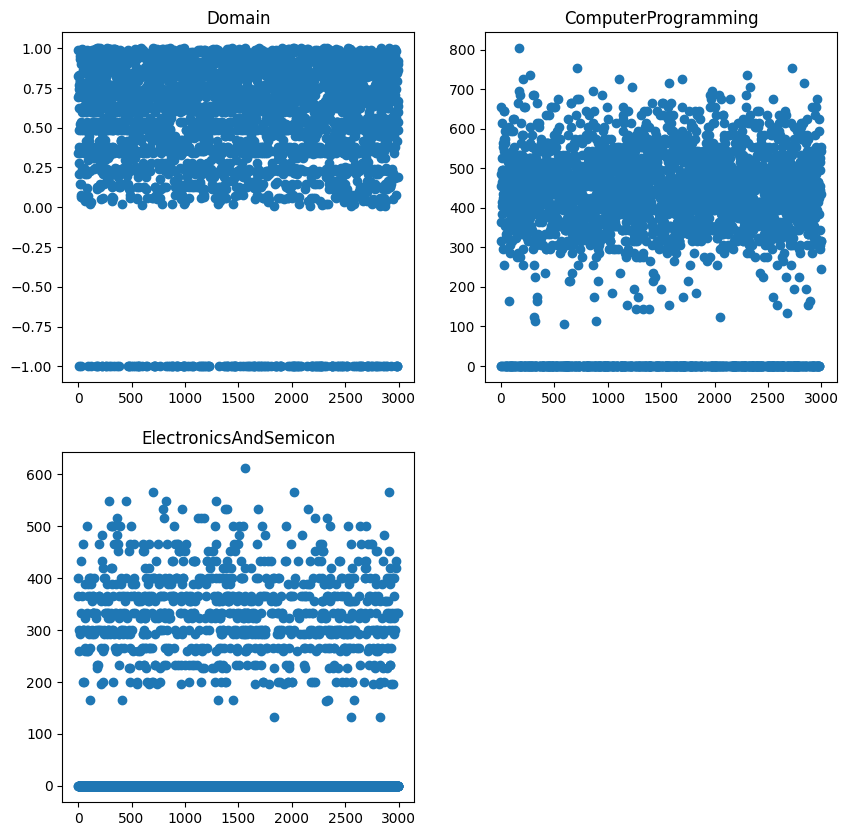

In [27]:
plt.figure(figsize=(10,10))

plt.subplot(2,2,1)
plt.scatter(data.index, data['Domain'])
plt.title('Domain')

plt.subplot(2,2,2)
plt.scatter(data.index, data['ComputerProgramming'])
plt.title('ComputerProgramming')

plt.subplot(2,2,3)
plt.scatter(data.index, data['ElectronicsAndSemicon'])
plt.title('ElectronicsAndSemicon')

First lets see Domain: So there are a lots of -1 here. I am assuming the students that didnt give this exam were assigned -1. So we will first assign NaN value to it and then fill those NaN values with the mean of this column.

In [28]:
data.replace(-1, np.nan)

,Gender,10percentage,12percentage,CollegeTier,Degree,Specialization,collegeGPA,English,Logical,Quant,...,MechanicalEngg,ElectricalEngg,TelecomEngg,CivilEngg,conscientiousness,agreeableness,extraversion,nueroticism,openess_to_experience,Salary
0,female,87.80,84.00,1,B.Tech/B.E.,instrumentation and control engineering,73.82,650,665,810,...,NaN,NaN,NaN,NaN,-0.1590,0.3789,1.2396,0.14590,0.2889,445000
1,male,57.00,64.50,2,B.Tech/B.E.,computer science & engineering,65.00,440,435,210,...,NaN,NaN,NaN,NaN,1.1336,0.0459,1.2396,0.52620,-0.2859,110000
2,male,77.33,85.17,2,B.Tech/B.E.,electronics & telecommunications,61.94,485,475,505,...,NaN,NaN,260.0,NaN,0.5100,-0.1232,1.5428,-0.29020,-0.2875,255000
3,male,84.30,86.00,1,B.Tech/B.E.,computer science & engineering,80.40,675,620,635,...,NaN,NaN,NaN,NaN,-0.4463,0.2124,0.3174,0.27270,0.4805,420000
4,female,82.00,75.00,2,B.Tech/B.E.,biotechnology,64.30,575,495,365,...,NaN,NaN,NaN,NaN,-1.4992,-0.7473,-1.0697,0.06223,0.1864,200000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2993,female,75.00,73.00,2,B.Tech/B.E.,electronics and communication engineering,70.00,505,485,445,...,NaN,NaN,NaN,NaN,-1.1901,0.9688,-1.0697,1.35490,0.0284,120000
2994,female,84.00,77.00,2,B.Tech/B.E.,information technology,75.20,345,585,395,...,NaN,NaN,NaN,NaN,-0.1082,0.0328,-0.4891,-0.29020,0.5024,120000
2995,male,91.40,65.56,2,B.Tech/B.E.,information technology,73.19,385,425,485,...,NaN,NaN,NaN,NaN,-0.8810,0.1888,-0.3440,0.06230,0.6603,385000
2996,male,88.64,65.16,2,B.Tech/B.E.,computer engineering,74.81,465,645,505,...,NaN,NaN,NaN,NaN,1.4374,1.2808,-0.4891,-1.46537,0.5419,530000


Filling null values with respective means of their columns

In [29]:
columns_with_nullvalues=[column for column in data.columns if data.isna().sum()[column]>0]
for column in columns_with_nullvalues:
    data[column]=data[column].fillna(data[column].mean())

# Data Visualization

In [30]:
data.head()

,Gender,10percentage,12percentage,CollegeTier,Degree,Specialization,collegeGPA,English,Logical,Quant,...,MechanicalEngg,ElectricalEngg,TelecomEngg,CivilEngg,conscientiousness,agreeableness,extraversion,nueroticism,openess_to_experience,Salary
0,female,87.80,84.00,1,B.Tech/B.E.,instrumentation and control engineering,73.82,650,665,810,...,-1,-1,-1,-1,-0.1590,0.3789,1.2396,0.14590,0.2889,445000
1,male,57.00,64.50,2,B.Tech/B.E.,computer science & engineering,65.00,440,435,210,...,-1,-1,-1,-1,1.1336,0.0459,1.2396,0.52620,-0.2859,110000
2,male,77.33,85.17,2,B.Tech/B.E.,electronics & telecommunications,61.94,485,475,505,...,-1,-1,260,-1,0.5100,-0.1232,1.5428,-0.29020,-0.2875,255000
3,male,84.30,86.00,1,B.Tech/B.E.,computer science & engineering,80.40,675,620,635,...,-1,-1,-1,-1,-0.4463,0.2124,0.3174,0.27270,0.4805,420000
4,female,82.00,75.00,2,B.Tech/B.E.,biotechnology,64.30,575,495,365,...,-1,-1,-1,-1,-1.4992,-0.7473,-1.0697,0.06223,0.1864,200000


<Axes: xlabel='Gender', ylabel='count'>

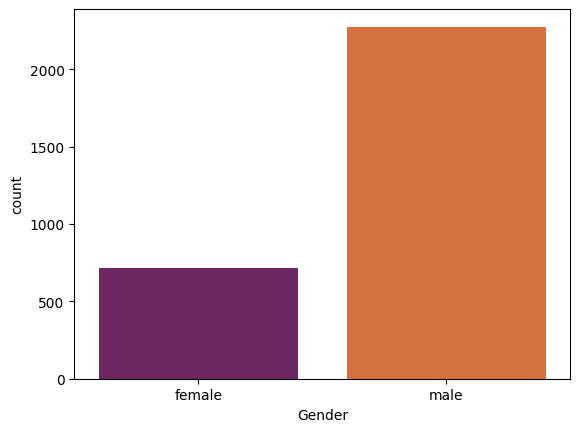

In [31]:
sns.countplot(x='Gender', data=data, palette='inferno')

<Axes: xlabel='10percentage', ylabel='12percentage'>

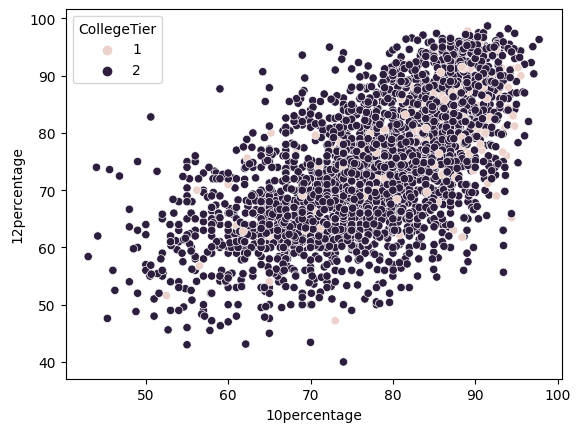

In [32]:
sns.scatterplot(x='10percentage', y='12percentage', data=data, hue=data['CollegeTier'])

10th and 12th marks have a linear relationship and are related to each other so we can drop one of them In this case we will be dropping 10thPercentage

In [33]:
data.drop(columns=['10percentage'], axis=1, inplace=True)

Lets visualize Specialization column

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16]),
 [Text(0, 0, 'instrumentation and control engineering'),
  Text(1, 0, 'computer science & engineering'),
  Text(2, 0, 'electronics & telecommunications'),
  Text(3, 0, 'biotechnology'),
  Text(4, 0, 'mechanical engineering'),
  Text(5, 0, 'information technology'),
  Text(6, 0, 'electronics and communication engineering'),
  Text(7, 0, 'computer engineering'),
  Text(8, 0, 'computer application'),
  Text(9, 0, 'others'),
  Text(10, 0, 'electrical engineering'),
  Text(11, 0, 'electronics and electrical engineering'),
  Text(12, 0, 'information science engineering'),
  Text(13, 0, 'electronics & instrumentation eng'),
  Text(14, 0, 'electronics engineering'),
  Text(15, 0, 'electronics and instrumentation engineering'),
  Text(16, 0, 'civil engineering')])

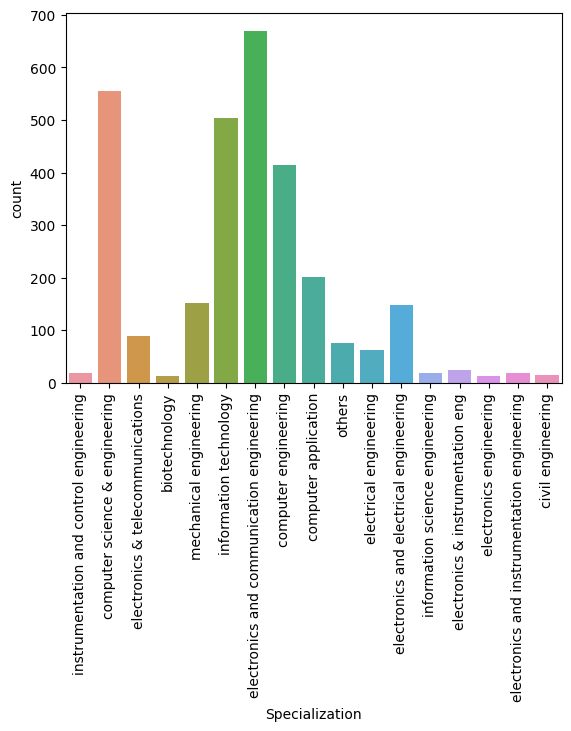

In [34]:
sns.countplot(x='Specialization', data=data)
plt.xticks(rotation=90)

<Axes: xlabel='collegeGPA', ylabel='Salary'>

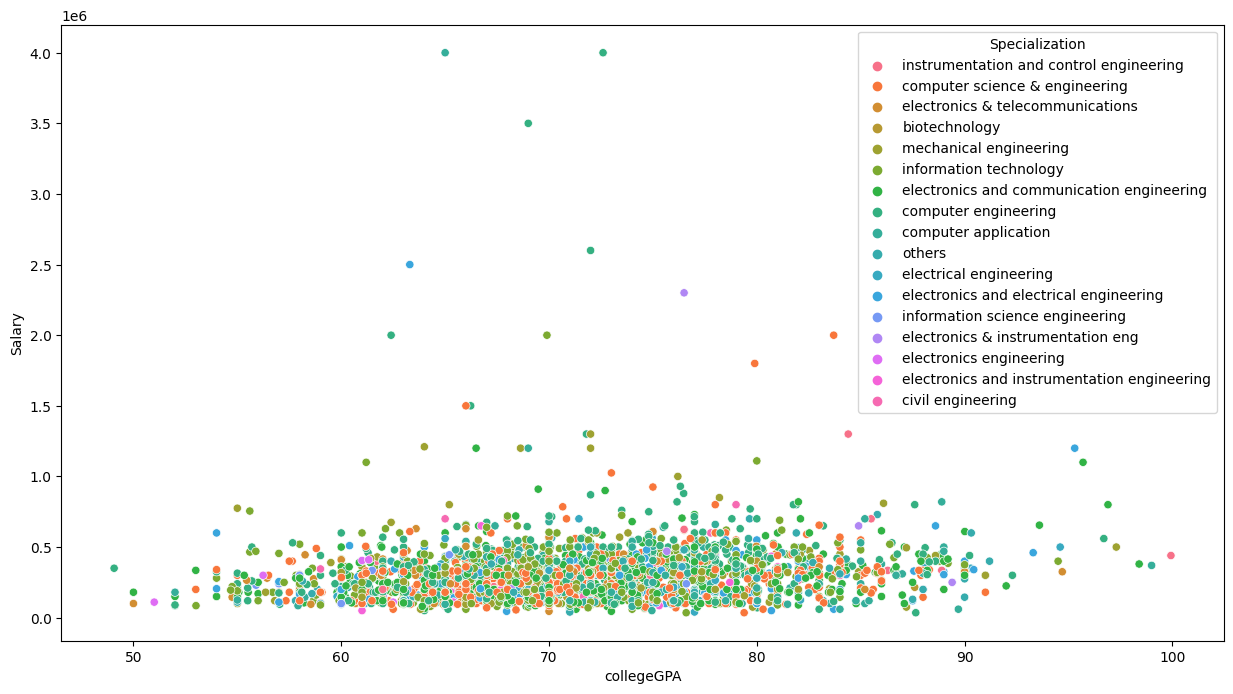

In [35]:
plt.figure(figsize=(15,8))
sns.scatterplot(x='collegeGPA', y='Salary', data=data, hue=data['Specialization'])

<Axes: xlabel='collegeGPA', ylabel='Salary'>

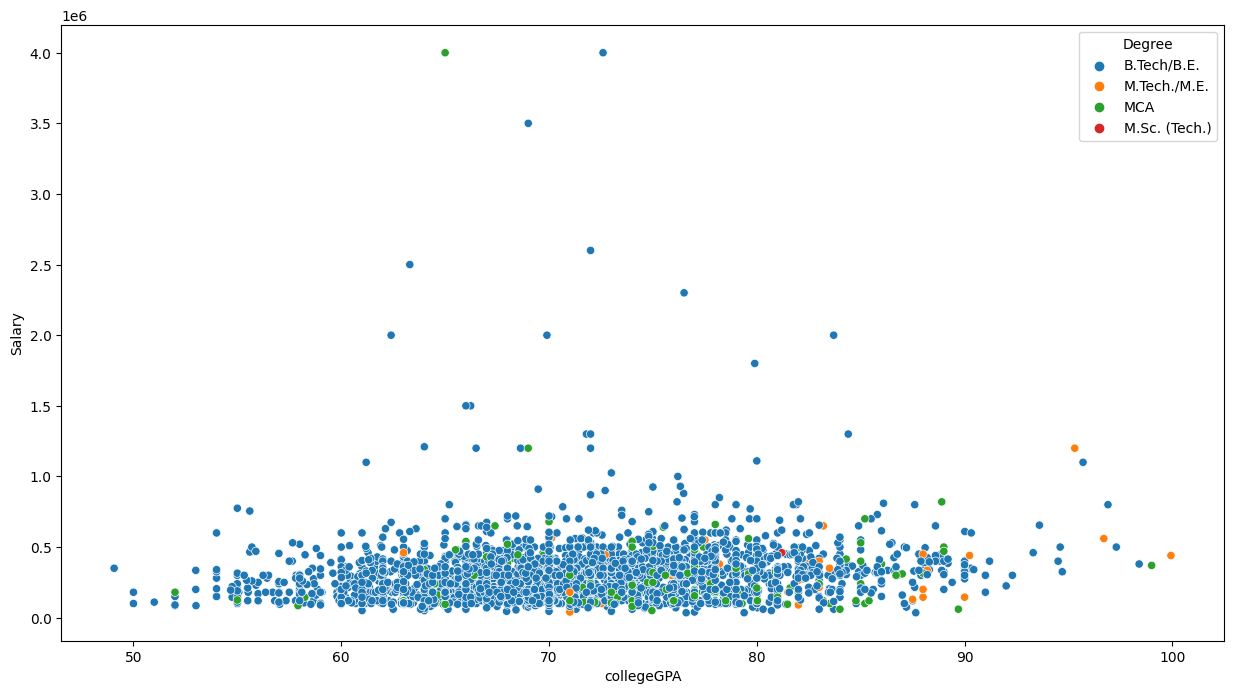

In [36]:
plt.figure(figsize=(15,8))
sns.scatterplot(x='collegeGPA', y='Salary', data=data, hue=data['Degree'])

GPA and salary is not having a linear kind of relationship

Openess to experience Vs Salary

<Axes: xlabel='openess_to_experience', ylabel='Salary'>

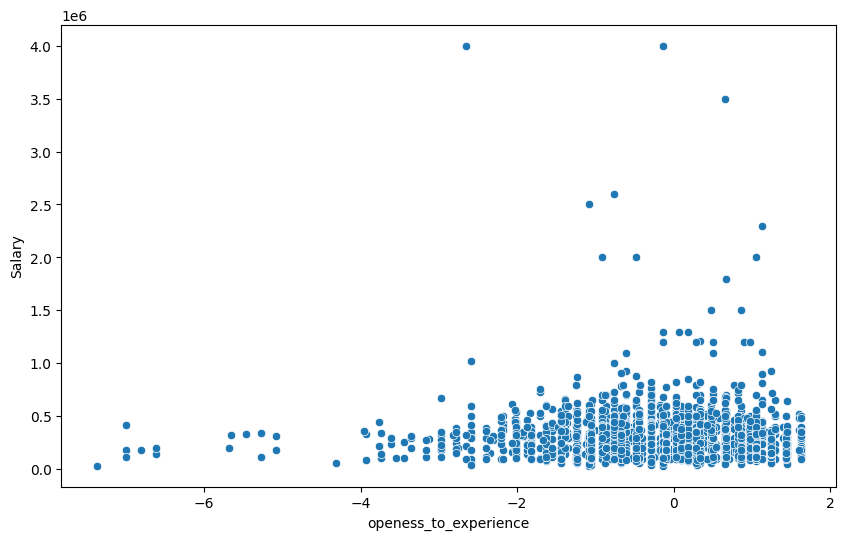

In [37]:
plt.figure(figsize=(10,6))
sns.scatterplot(x='openess_to_experience', y='Salary', data=data)

In [38]:
data.columns

Index(['Gender', '12percentage', 'CollegeTier', 'Degree', 'Specialization',
       'collegeGPA', 'English', 'Logical', 'Quant', 'Domain',
       'ComputerProgramming', 'ElectronicsAndSemicon', 'ComputerScience',
       'MechanicalEngg', 'ElectricalEngg', 'TelecomEngg', 'CivilEngg',
       'conscientiousness', 'agreeableness', 'extraversion', 'nueroticism',
       'openess_to_experience', 'Salary'],
      dtype='object')

Domain Vs Salary

<Axes: xlabel='Domain', ylabel='Salary'>

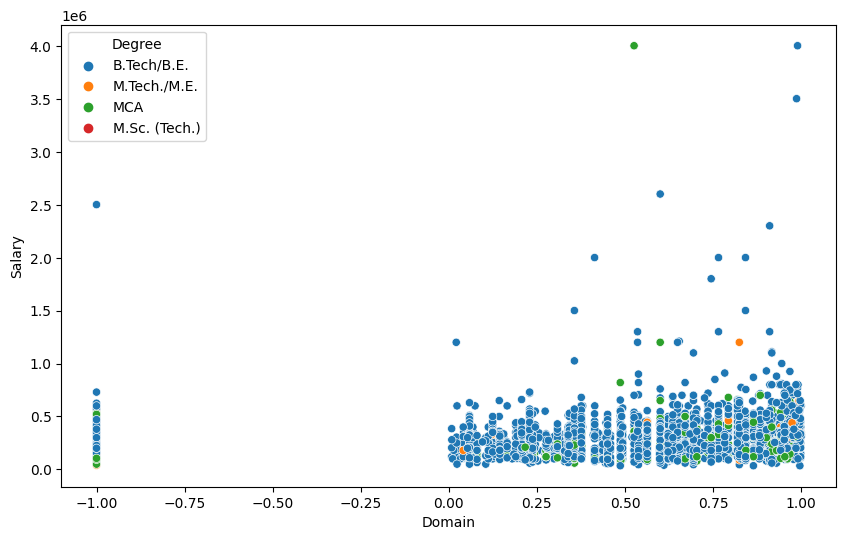

In [39]:
plt.figure(figsize=(10,6))
sns.scatterplot(x='Domain', y='Salary', data=data, hue=data['Degree'])

<Axes: >

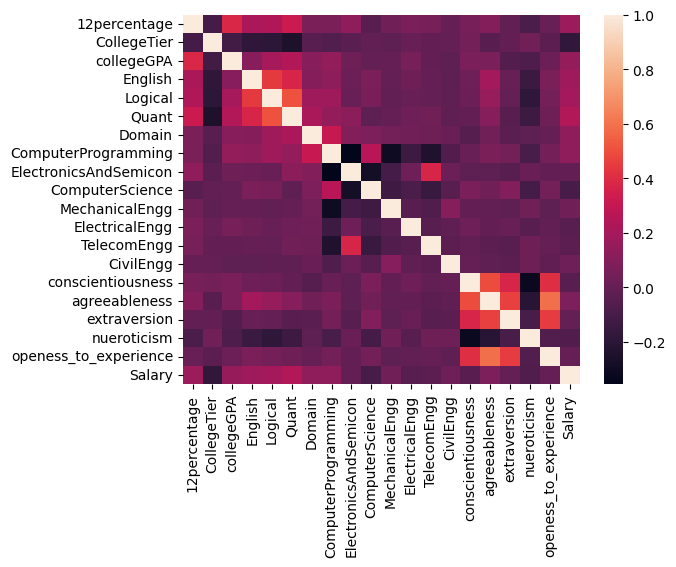

In [40]:
sns.heatmap(data.corr(numeric_only=True))

# Data Preprocessing

In [41]:
data.head()

,Gender,12percentage,CollegeTier,Degree,Specialization,collegeGPA,English,Logical,Quant,Domain,...,MechanicalEngg,ElectricalEngg,TelecomEngg,CivilEngg,conscientiousness,agreeableness,extraversion,nueroticism,openess_to_experience,Salary
0,female,84.00,1,B.Tech/B.E.,instrumentation and control engineering,73.82,650,665,810,0.694479,...,-1,-1,-1,-1,-0.1590,0.3789,1.2396,0.14590,0.2889,445000
1,male,64.50,2,B.Tech/B.E.,computer science & engineering,65.00,440,435,210,0.342315,...,-1,-1,-1,-1,1.1336,0.0459,1.2396,0.52620,-0.2859,110000
2,male,85.17,2,B.Tech/B.E.,electronics & telecommunications,61.94,485,475,505,0.824666,...,-1,-1,260,-1,0.5100,-0.1232,1.5428,-0.29020,-0.2875,255000
3,male,86.00,1,B.Tech/B.E.,computer science & engineering,80.40,675,620,635,0.990009,...,-1,-1,-1,-1,-0.4463,0.2124,0.3174,0.27270,0.4805,420000
4,female,75.00,2,B.Tech/B.E.,biotechnology,64.30,575,495,365,0.278457,...,-1,-1,-1,-1,-1.4992,-0.7473,-1.0697,0.06223,0.1864,200000


We need to do label encoding on all string columns as ML model can't take string as input.

In [42]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 2989 entries, 0 to 2997
Data columns (total 23 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   Gender                 2989 non-null   object 
 1   12percentage           2989 non-null   float64
 2   CollegeTier            2989 non-null   int64  
 3   Degree                 2989 non-null   object 
 4   Specialization         2989 non-null   object 
 5   collegeGPA             2989 non-null   float64
 6   English                2989 non-null   int64  
 7   Logical                2989 non-null   int64  
 8   Quant                  2989 non-null   int64  
 9   Domain                 2989 non-null   float64
 10  ComputerProgramming    2989 non-null   int64  
 11  ElectronicsAndSemicon  2989 non-null   int64  
 12  ComputerScience        2989 non-null   int64  
 13  MechanicalEngg         2989 non-null   int64  
 14  ElectricalEngg         2989 non-null   int64  
 15  TelecomEn

Columns: Gender, Degree, Specialization have datatypes as obj i.e. string so we need to use label encoder to convert them into integer

In [43]:
from sklearn.preprocessing import LabelEncoder
le=LabelEncoder()

data['Gender']=le.fit_transform(data['Gender'])
data['Degree']=le.fit_transform(data['Degree'])
data['Specialization']=le.fit_transform(data['Specialization'])

In [44]:
data.head()

,Gender,12percentage,CollegeTier,Degree,Specialization,collegeGPA,English,Logical,Quant,Domain,...,MechanicalEngg,ElectricalEngg,TelecomEngg,CivilEngg,conscientiousness,agreeableness,extraversion,nueroticism,openess_to_experience,Salary
0,0,84.00,1,0,14,73.82,650,665,810,0.694479,...,-1,-1,-1,-1,-0.1590,0.3789,1.2396,0.14590,0.2889,445000
1,1,64.50,2,0,4,65.00,440,435,210,0.342315,...,-1,-1,-1,-1,1.1336,0.0459,1.2396,0.52620,-0.2859,110000
2,1,85.17,2,0,7,61.94,485,475,505,0.824666,...,-1,-1,260,-1,0.5100,-0.1232,1.5428,-0.29020,-0.2875,255000
3,1,86.00,1,0,4,80.40,675,620,635,0.990009,...,-1,-1,-1,-1,-0.4463,0.2124,0.3174,0.27270,0.4805,420000
4,0,75.00,2,0,0,64.30,575,495,365,0.278457,...,-1,-1,-1,-1,-1.4992,-0.7473,-1.0697,0.06223,0.1864,200000


# Creating XGBoost Model

In [45]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

from xgboost import XGBRegressor

In [46]:
x=data.drop(columns=['Salary'], axis=1)
y=data['Salary']

sc=StandardScaler()
x=sc.fit_transform(x)

X_train, X_test, y_train, y_test=train_test_split(x, y, test_size=0.2, shuffle=True, random_state=0)

In [47]:
xgb=XGBRegressor()
xgb.fit(X_train, y_train)

XGBRegressor(base_score=None, booster=None, callbacks=None,
             colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=None, device=None, early_stopping_rounds=None,
             enable_categorical=False, eval_metric=None, feature_types=None,
             gamma=None, grow_policy=None, importance_type=None,
             interaction_constraints=None, learning_rate=None, max_bin=None,
             max_cat_threshold=None, max_cat_to_onehot=None,
             max_delta_step=None, max_depth=None, max_leaves=None,
             min_child_weight=None, missing=nan, monotone_constraints=None,
             multi_strategy=None, n_estimators=None, n_jobs=None,
             num_parallel_tree=None, random_state=None, ...)

In [48]:
predictions=xgb.predict(X_test)

In [49]:
diff=y_test-predictions

In [50]:
diff

1072   -112699.875000
1110     48617.781250
317    -115323.312500
2367     98478.500000
2736   -154801.625000
            ...      
2040   -119470.312500
477     252196.765625
1370     -4958.359375
2078    150837.812500
1315   -163265.843750
Name: Salary, Length: 598, dtype: float64

/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


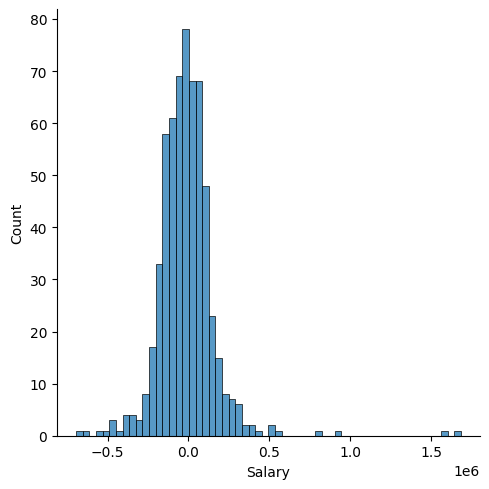

In [51]:
sns.displot(diff)

In [52]:
xgb_r2_score=xgb.score(X_test, y_test)
print(xgb_r2_score)

0.003775539785439208
